In [1]:
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#cv2.imshow(image)
from google.colab.patches import cv2_imshow

### 다양한 객체 인식 by Haarcascade

#### car

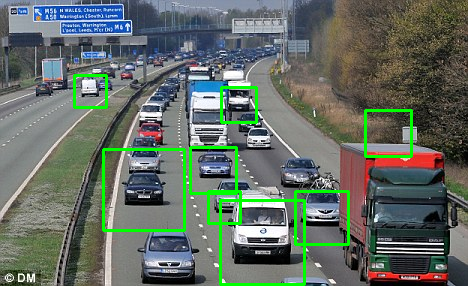

In [ ]:
car_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/cars.xml')
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/car.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = car_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=5)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### clock

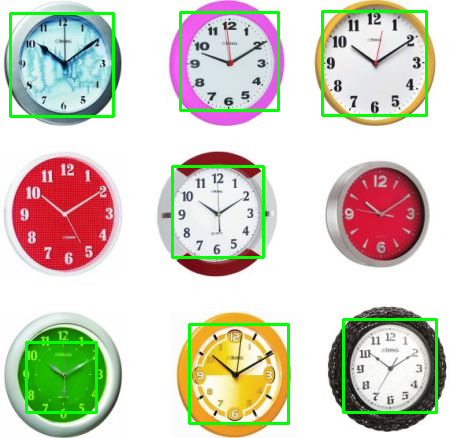

In [ ]:
clock_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/clocks.xml')
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/clock.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = clock_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=1)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### full body

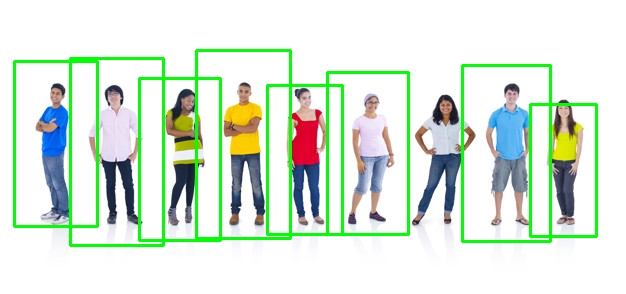

In [ ]:
full_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/fullbody.xml')
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = full_detector.detectMultiScale(image_gray, scaleFactor = 1.05, minNeighbors=5,
                                              minSize = (50,50))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

### Haarcascade vs HOG vs CNN 비교
- 각각의 기술로 만든 얼굴탐지기를 같은이미지에 적용해보자

#### Haarcascade

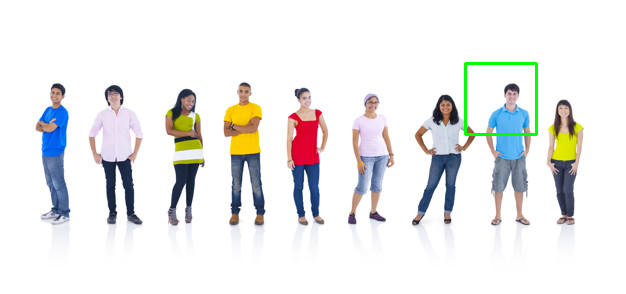

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
haarcascade_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/haarcascade_frontalface_default.xml')
detections = haarcascade_detector.detectMultiScale(image_gray, scaleFactor = 1.001, minNeighbors=5, minSize = (5,5))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### HOG

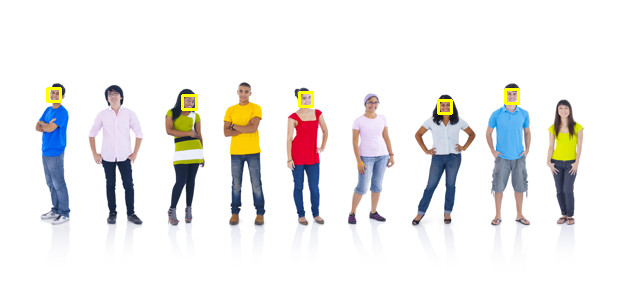

In [4]:
import dlib
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people3.jpg')
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 4)
for face in detections:
    l, t, r, b = (face.left(), face.top(), face.right(), face.bottom())
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

#### CNN

0.44638746976852417
0.08115917444229126


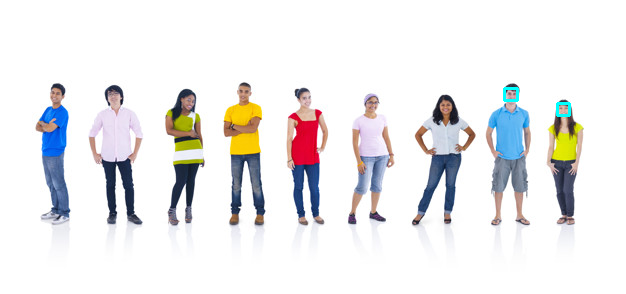

In [5]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people3.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Weights/mmod_human_face_detector.dat')
detections = cnn_detector(image, 4)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)